Script di bawah ini mengimpor berbagai library yang diperlukan untuk proses pengolahan citra dan analisis data. Library yang digunakan antara lain: `os` untuk manajemen file dan direktori, `cv2` (OpenCV) untuk pengolahan citra, `numpy` untuk operasi numerik dan array, `pandas` untuk manipulasi dan analisis data, `math` untuk operasi matematika dasar, `tqdm` untuk menampilkan progress bar, `seaborn` untuk visualisasi data, `sklearn.svm` untuk Support Vector Machine (SVM) classifier, `matplotlib.pyplot` untuk membuat plot dan visualisasi data, `sklearn.impute` untuk menangani data yang hilang, `sklearn.preprocessing` untuk preprocessing data seperti scaling, `sklearn.neighbors` untuk K-Nearest Neighbors (KNN) classifier, `sklearn.ensemble` untuk Random Forest classifier, `matplotlib.colors` untuk mengatur skema warna pada plot, `sklearn.model_selection` untuk membagi dataset menjadi data latih dan data uji, serta `sklearn.metrics` untuk menghitung metrik evaluasi model seperti akurasi, presisi, recall, F1 score, dan confusion matrix.

In [1]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
from rembg import remove
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Script di bawah ini merupakan fungsi `resize_image`, yang digunakan untuk mengubah ukuran sebuah gambar ke ukuran yang ditentukan (`target_size`). Fungsi ini menerima dua parameter: `image`, yang merupakan gambar asli dalam format NumPy array dengan format (tinggi, lebar, channel), dan `target_size`, yang merupakan tuple berisi lebar dan tinggi target untuk gambar yang diubah ukurannya. Prosesnya melibatkan pengulangan untuk setiap piksel dalam gambar target (`target_height` dan `target_width`), di mana posisi piksel asli dihitung berdasarkan perbandingan antara ukuran asli dan ukuran target. Hasilnya adalah gambar yang telah diubah ukurannya dalam format NumPy array dengan channel RGB.

In [2]:
def resize_image(image, target_size):

    original_height, original_width, _ = image.shape
    target_width, target_height = target_size
    resized_image = np.zeros((target_height, target_width, 3), dtype=np.uint8)
    
    for i in range(target_height):
        for j in range(target_width):
            original_x = int(j * original_width / target_width)
            original_y = int(i * original_height / target_height)
            resized_image[i, j] = image[original_y, original_x]
    
    return resized_image

Script di bawah ini merupakan fungsi `insertGambar`, yang digunakan untuk memuat dan memproses gambar-gambar dari direktori yang diberikan (`folder`). Fungsi ini menerima satu parameter yaitu `folder`, yang merupakan path direktori yang berisi sub-direktori berdasarkan kategori label gambar. Prosesnya melibatkan inisialisasi beberapa list kosong untuk menyimpan data gambar (`data`), nama file (`filenames`), label data (`datalabel`), path file (`path`), dan distribusi jumlah gambar per label (`data_distribution`). Selanjutnya, untuk setiap label dalam direktori, gambar-gambar dimuat dengan batasan maksimum 100 gambar per label. Setiap gambar dimuat, diubah ke format RGB, diubah ukurannya menggunakan fungsi `resize_image`, dan kemudian ditambahkan ke list yang sesuai. Fungsi ini mengembalikan lima hasil: `data` (list gambar), `filenames` (list nama file), `datalabel` (list label), `path` (list path file), dan `data_distribution` (dictionary jumlah gambar per label).

In [3]:

def insertGambar(folder):
    data = []
    filenames = []
    datalabel = [] 
    path = []
    data_distribution = {}
    for label in (os.listdir(folder)):
        images = os.listdir(folder+label)
        data_distribution[label] = len(images)
        datalabel.append(label)
        print(label)
        count = 0
        for filename in tqdm(os.listdir(folder+label)):
            # if count == 100:
            #     break
            # else :
            count += 1
            img = cv.imread(os.path.join(folder+label,filename))
            if img is not None:
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                img = resize_image(img, (250, 250))
                filenames.append(filename)
                path.append(label)
                data.append(img)
    return data, filenames, datalabel, path , data_distribution

Script di bawah ini mengeksekusi fungsi `insertGambar` dengan parameter `"train/"` (direktori yang berisi data gambar latihan) dan menyimpan hasilnya ke dalam variabel `images`, `filenames`, `labels`, `path`, dan `distribusi`. Kemudian, informasi seperti jumlah data gambar (`images`), jumlah label (`labels`), jumlah nama file (`filenames`), dan distribusi jumlah gambar per label (`distribusi`) dicetak ke layar untuk memberikan gambaran tentang data yang telah dimuat.

In [4]:
images, filenames,labels, path, distribusi = insertGambar("train/") 
print("Data: ", len(images))
print("Label: ", len(labels))
print("Filenames: ", len(filenames))
print("Data Distribution: ", distribusi)

BALI STARLING


100%|██████████| 132/132 [00:44<00:00,  2.99it/s]


SAMATRAN THRUSH


100%|██████████| 153/153 [00:58<00:00,  2.62it/s]


VISAYAN HORNBILL


100%|██████████| 163/163 [00:35<00:00,  4.62it/s]


Data:  448
Label:  3
Filenames:  448
Data Distribution:  {'BALI STARLING': 132, 'SAMATRAN THRUSH': 153, 'VISAYAN HORNBILL': 163}


Script di bawah ini merupakan fungsi `display_sample`, yang digunakan untuk menampilkan sampel gambar secara visual. Fungsi ini menerima satu parameter yaitu `images`, yang merupakan list atau array berisi gambar-gambar dalam format NumPy array. Prosesnya melibatkan pembuatan plot dengan ukuran gambar (figsize) 20x10 inci. Selanjutnya, untuk tujuh gambar pertama dalam `images`, setiap gambar ditampilkan dalam subplot yang sesuai dengan konfigurasi yang ditentukan, yaitu tanpa sumbu (xticks dan yticks kosong), tanpa grid, dan menggunakan colormap 'gray' untuk menampilkan gambar.


In [5]:
def display_sample(images):
  plt.figure(figsize=(20,10))
  for i in range(7):
    plt.subplot(1,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap='gray')
  plt.show()    

Script di bawah ini merupakan fungsi `removeBackground`, yang digunakan untuk menghapus latar belakang dari setiap gambar dalam list `images`. Fungsi ini menerima satu parameter yaitu `images`, yang merupakan list atau array berisi gambar-gambar dalam format NumPy array. Prosesnya melibatkan iterasi melalui setiap gambar dalam `images` menggunakan `tqdm` untuk menampilkan progress bar. Setiap gambar diolah dengan fungsi `remove` (yang tidak dijelaskan dalam konteks ini) dan hasilnya ditambahkan ke list `removed_data`. Fungsi ini mengembalikan `removed_data`, yaitu list berisi gambar-gambar yang telah latar belakangnya dihapus.


In [6]:
def removeBackground(images):
    removed_data = []
    for i in tqdm(range(len(images))):
        removed_data.append(remove(images[i]))
    return removed_data

Script di bawah ini mengeksekusi fungsi `removeBackground` dengan parameter `images` (list gambar yang telah dimuat sebelumnya). Hasil dari proses penghapusan latar belakang gambar disimpan dalam variabel `remove_bg`. Selanjutnya, fungsi `display_sample` dipanggil dengan parameter `remove_bg` untuk menampilkan sampel tujuh gambar pertama yang telah dihapus latar belakangnya secara visual.


100%|██████████| 448/448 [38:00<00:00,  5.09s/it]


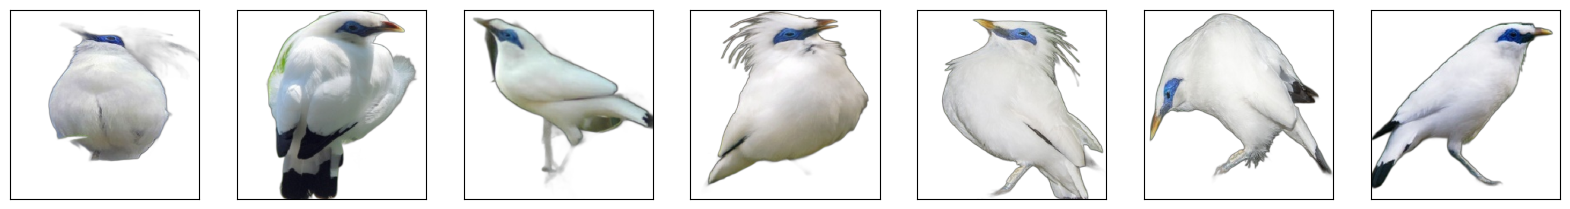

In [7]:
remove_bg = removeBackground(images)  

display_sample(remove_bg)

Script di bawah ini merupakan fungsi `gray_scaling`, yang digunakan untuk mengubah gambar-gambar dalam format RGB menjadi skala abu-abu (grayscale). Fungsi ini menerima satu parameter yaitu `data`, yang merupakan list atau array berisi gambar-gambar dalam format NumPy array dengan channel RGB. Prosesnya melibatkan iterasi melalui setiap gambar dalam `data`. Setiap gambar diubah ke skala abu-abu menggunakan fungsi `cv.cvtColor` dengan mode konversi `cv.COLOR_BGR2GRAY`, dan hasilnya ditambahkan ke dalam list `grayData`. Fungsi ini mengembalikan `grayData`, yaitu list berisi gambar-gambar dalam skala abu-abu.
Bagian `gray_img = gray_scaling(remove_bg)` digunakan untuk mengeksekusi fungsi `gray_scaling` dengan parameter `remove_bg` (list gambar yang telah latar belakangnya dihapus). Hasil dari proses konversi ke skala abu-abu disimpan dalam variabel `gray_img`. Selanjutnya, fungsi `display_sample` dipanggil dengan parameter `gray_img` untuk menampilkan sampel tujuh gambar pertama dalam skala abu-abu secara visual.

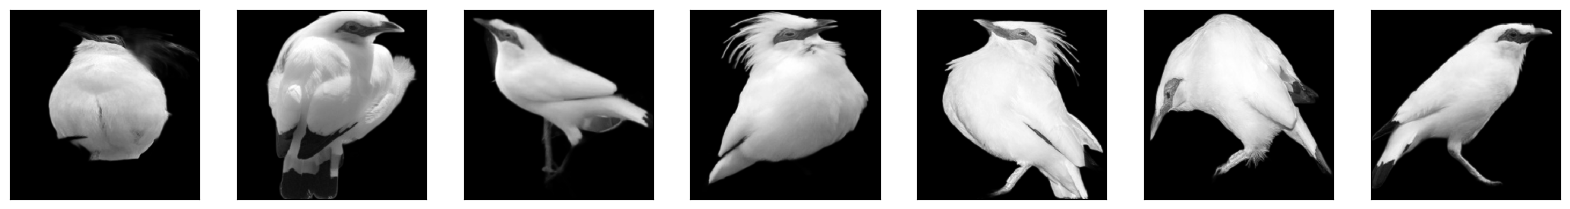

In [8]:
def gray_scaling(data):
    grayData = []
    for img in data:
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        grayData.append(gray)
    return grayData

gray_img = gray_scaling(remove_bg)

display_sample(gray_img)

Script di bawah ini merupakan fungsi `normalisasi`, yang digunakan untuk normalisasi gambar-gambar dalam skala abu-abu ke rentang nilai 0-255. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan list atau array berisi gambar-gambar dalam format NumPy array dengan skala abu-abu. Prosesnya melibatkan iterasi melalui setiap gambar dalam `data`. Setiap gambar dinormalisasi menggunakan fungsi `cv.normalize` dengan parameter yang sesuai untuk mengubah rentang nilai gambar menjadi 0-255 menggunakan `cv.NORM_MINMAX` dan tipe data `cv.CV_8U`, dan hasilnya ditambahkan ke dalam list `normData`. Fungsi ini mengembalikan `normData`, yaitu list berisi gambar-gambar yang telah dinormalisasi.
Bagian `normData = normalisasi(gray_img)`digunakan untuk mengeksekusi fungsi `normalisasi` dengan parameter `gray_img` (list gambar dalam skala abu-abu). Hasil dari proses normalisasi disimpan dalam variabel `normData`. Selanjutnya, fungsi `display_sample` dipanggil dengan parameter `normData` untuk menampilkan sampel tujuh gambar pertama yang telah dinormalisasi ke rentang nilai 0-255 secara visual.

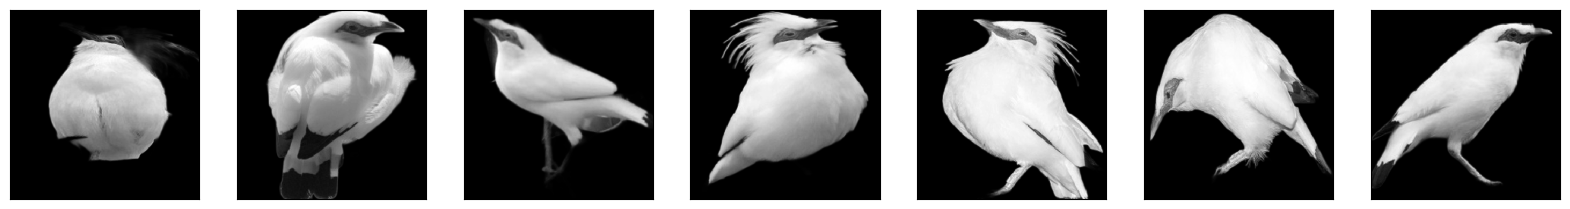

In [9]:
def normalisasi(data):
    normData = []
    for img in data:
        norm = cv.normalize(img, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
        normData.append(norm)
    return normData

normData = normalisasi(gray_img)

display_sample(normData)

## Preprosessing

Script di bawah ini merupakan fungsi `ekualisasi`, yang digunakan untuk melakukan ekualisasi histogram pada gambar grayscale. Fungsi ini menerima satu parameter yaitu `img`, yang merupakan gambar dalam format NumPy array dengan skala abu-abu. Prosesnya melibatkan pembuatan histogram untuk menghitung frekuensi kemunculan setiap nilai intensitas piksel. Selanjutnya, dilakukan perhitungan distribusi kumulatif dari histogram untuk mendapatkan nilai target baru berdasarkan distribusi kumulatif. Nilai intensitas piksel pada gambar awal diganti dengan nilai target yang telah dihitung untuk mendapatkan hasil gambar yang telah diekualisasi histogramnya.
Dan terdapat juga fungsi `ekualisasiData`, yang digunakan untuk menerapkan proses ekualisasi histogram ke seluruh gambar dalam sebuah dataset. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan list atau array berisi gambar-gambar dalam format NumPy array dengan skala abu-abu. Prosesnya melibatkan iterasi melalui setiap gambar dalam `data` dan menerapkan fungsi `ekualisasi` untuk setiap gambar tersebut. Hasil dari proses ekualisasi histogram untuk setiap gambar disimpan dalam list `hasil`.

In [10]:
def ekualisasi(img):
    histogram = np.zeros(256).astype(int)
    hImg, wImg = img.shape

    for i in range(hImg):
        for j in range(wImg):
            value = img[i, j]
            histogram[value] += 1
    
    dist_kumulatif = np.zeros(256).astype(int)
    dist_kumulatif[0] = histogram[0]
    for i in range(1, 256):
        dist_kumulatif[i] = dist_kumulatif[i-1] + histogram[i]
    
    target_value = dist_kumulatif * (256-1) / (hImg * wImg)
    target_value = np.floor(target_value).astype(int)

    result = target_value[img]
    return result

def ekualisasiData(data):
    hasil = []
    for img in data:
        gambar = ekualisasi(img)
        hasil.append(gambar)
    return hasil

Script di bawah ini mengeksekusi fungsi `ekualisasiData` dengan parameter `normData` (list gambar dalam skala abu-abu yang telah dinormalisasi sebelumnya). Hasil dari proses ekualisasi histogram disimpan dalam variabel `ekualisasiData`. Selanjutnya, fungsi `display_sample` dipanggil dengan parameter `ekualisasiData` untuk menampilkan sampel tujuh gambar pertama yang telah diekualisasi histogramnya secara visual.

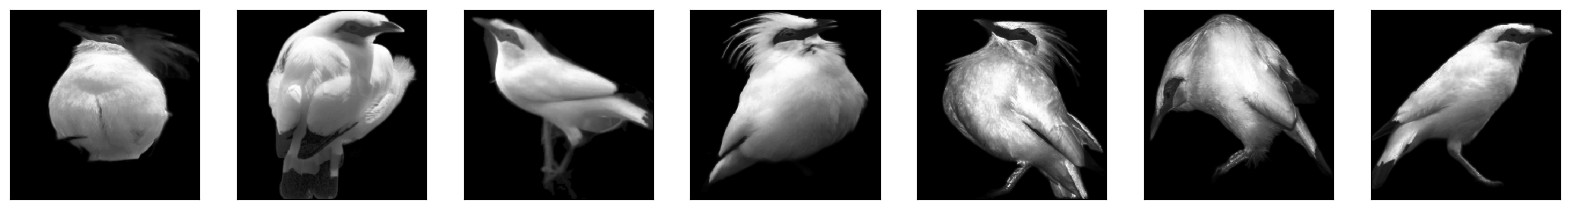

In [11]:
ekualisasiData = ekualisasiData(normData)

display_sample(ekualisasiData)

Script di bawah ini merupakan fungsi `meanFilter`, yang digunakan untuk menerapkan filter rata-rata (mean filter) pada gambar grayscale. Fungsi ini menerima satu parameter yaitu `image`, yang merupakan gambar dalam format NumPy array dengan skala abu-abu. Prosesnya melibatkan penggunaan kernel berukuran 3x3 yang diisi dengan nilai nol. Gambar awal di-pad dengan nilai nol di sekelilingnya (padding), kemudian filter rata-rata diterapkan dengan mengambil nilai rata-rata dari nilai piksel di sekitar setiap piksel dalam gambar dengan ukuran kernel 3x3. Hasil dari filter rata-rata diterapkan pada setiap piksel dalam gambar awal dan disimpan dalam variabel `result`.
Dan juga terdapat fungsi `meanFilterData`, yang digunakan untuk menerapkan filter rata-rata ke seluruh gambar dalam sebuah dataset. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan list atau array berisi gambar-gambar dalam format NumPy array dengan skala abu-abu. Prosesnya melibatkan iterasi melalui setiap gambar dalam `data` dan menerapkan fungsi `meanFilter` untuk setiap gambar tersebut. Hasil dari proses filter rata-rata untuk setiap gambar disimpan dalam list `hasil`.

In [12]:
def meanFilter(image):
    heightImage, widthImage = image.shape
    padImage = np.pad(image, (1,1))
    kernel = np.zeros((3,3))
    result = np.zeros([heightImage, widthImage]).astype(int)
    for i in range(heightImage):
        for j in range(widthImage):
            temp = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    temp += padImage[i+k, j+l]
            result[i, j] = int(temp/(kernel.shape[0]*kernel.shape[1]))
    return result

def meanFilterData(data):
    hasil = []
    for img in tqdm(data):
        gambar = meanFilter(img)
        hasil.append(gambar)
    return hasil

Script di bawah ini mengeksekusi fungsi `meanFilterData` dengan parameter `ekualisasiData` (list gambar dalam skala abu-abu yang telah diekualisasi histogramnya). Hasil dari proses filter rata-rata disimpan dalam variabel `meanData`. Selanjutnya, fungsi `display_sample` dipanggil dengan parameter `meanData` untuk menampilkan sampel tujuh gambar pertama yang telah diaplikasikan filter rata-ratanya secara visual.

100%|██████████| 448/448 [03:14<00:00,  2.31it/s]


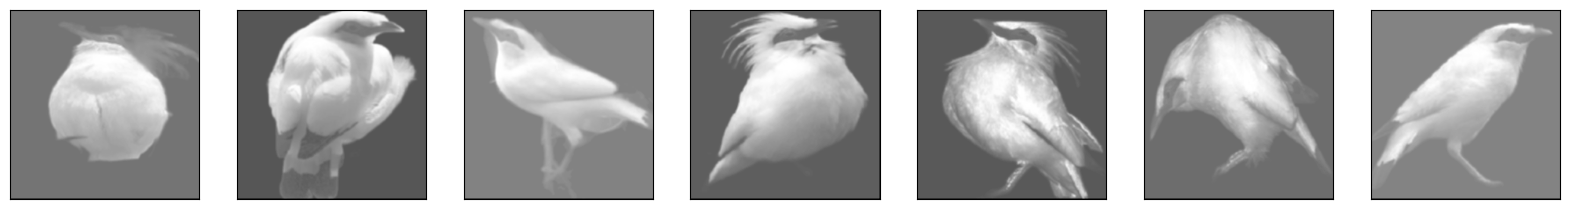

In [13]:
meanData = meanFilterData(ekualisasiData)

display_sample(meanData)

### batas

Script di bawah ini merupakan fungsi `matriksTransformasi`, yang digunakan untuk melakukan transformasi matriks dari suatu matriks `matriks`. Fungsi ini menerima satu parameter yaitu `matriks`, yang merupakan matriks NumPy. Prosesnya melibatkan iterasi melalui setiap elemen matriks dan mentransposisikan baris dan kolomnya, sehingga hasilnya adalah matriks transposisi dari matriks input.
Dan juga terdapat fungsi `sum`, yang digunakan untuk menghitung jumlah semua elemen dalam matriks `matriks`. Fungsi ini menerima satu parameter yaitu `matriks`, yang merupakan matriks NumPy. Prosesnya melibatkan iterasi melalui setiap elemen matriks dan menjumlahkan nilai-nilai elemennya.

In [14]:
def matriksTransformasi(matriks):
    hasil = np.zeros(matriks.shape)
    for i in range(matriks.shape[0]):
        for j in range(matriks.shape[1]):
            hasil[i][j] = matriks[j][i]
    return hasil
def sum(matriks):
    hasil = 0
    for i in range(len(matriks)):
        for j in range(len(matriks[0])):
            hasil += matriks[i][j]
    return hasil

Script di bawah ini merupakan fungsi `derajat`, yang digunakan untuk menghitung matriks Gray-Level Co-occurrence Matrix (GLCM) berdasarkan sudut (derajat) tertentu pada gambar grayscale `img`. Fungsi ini memiliki dua parameter, yaitu `img` yang merupakan gambar dalam format NumPy array dengan skala abu-abu, dan `derajat` yang merupakan sudut (0, 45, 90, atau 135). Prosesnya melibatkan inisialisasi matriks kosong `temp`, yang kemudian diisi dengan nilai kemunculan pasangan piksel dengan intensitas tertentu berdasarkan sudut yang ditentukan. Hasil dari matriks GLCM untuk setiap sudut diperoleh dengan menambahkan matriks temp dengan transposisinya menggunakan fungsi `matriksTransformasi`, kemudian dilakukan normalisasi dengan membagi setiap elemen dengan total jumlah elemen matriks.

In [15]:
def derajat(img, derajat):
    max = int(np.max(img))
    temp=np.zeros([max+1,max+1])
    if derajat == 0:
        for i in range (len(img)):
            for j in range (len(img[0])-1):
                temp[img[i,j],img[i,j+1]] += 1
    elif derajat == 45:
        for i in range (len (img)-1):
            for j in range (len (img[0])-1):
                temp[img[i+1,j],img[i,j+1]] += 1
    elif derajat == 90:
        for i in range (len (img)-1):
            for j in range (len (img[0])):
                temp[img[i+1,j],img[i,j]] += 1
    elif derajat == 135:
        for i in range (len (img)-1):
            for j in range (len (img[0])-1):
                temp[img[i,j],img[i+1,j+1]] += 1
    hasil = temp+matriksTransformasi(temp)
    total = sum(hasil)
    for i in range (len (hasil)):
        for j in range (len (hasil)):
            hasil[i,j]/=total
    return hasil

Script di bawah ini merupakan fungsi `GLCM`, yang digunakan untuk menghitung GLCM untuk setiap gambar dalam dataset `image`. Fungsi ini menerima satu parameter yaitu `image`, yang merupakan list atau array berisi gambar-gambar dalam format NumPy array dengan skala abu-abu. Prosesnya melibatkan iterasi melalui setiap gambar dalam `image` dan memanggil fungsi `derajat` untuk menghitung GLCM dengan sudut-sudut yang berbeda (0, 45, 90, dan 135). Hasil dari GLCM untuk setiap gambar disimpan dalam list `hasil`.

In [16]:
def GLCM(image):
    hasil = []
    for img in tqdm(image):
        if np.min(img) < 0:
            continue
        data = []
        data.append(derajat(img,0))
        data.append(derajat(img,45))
        data.append(derajat(img,90))
        data.append(derajat(img,135))
        hasil.append(data)    
    return hasil

Script di bawah ini mengeksekusi fungsi `GLCM` dengan parameter `meanData` (list gambar yang telah diaplikasikan filter rata-rata sebelumnya). Hasil dari GLCM untuk setiap gambar disimpan dalam variabel `hasil`.

In [17]:
hasil = GLCM(meanData)

100%|██████████| 448/448 [07:44<00:00,  1.04s/it]


Script di bawah ini merupakan fungsi `contrast`, yang digunakan untuk menghitung nilai kontras dari sebuah matriks `data`. Fungsi ini melakukan iterasi melalui setiap elemen matriks dan menghitung nilai kontribusi masing-masing elemen terhadap kontras gambar menggunakan rumus \( \sum_{i,j} data[i,j] \times (i-j)^2 \).

In [18]:
def contrast (data):
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil+=data[i,j]*pow(i-j,2)
    return hasil

Script di bawah ini merupakan fungsi `dissimilarity`, yang digunakan untuk menghitung nilai dissimilarity dari sebuah matriks `data`. Fungsi ini melakukan iterasi melalui setiap elemen matriks dan menghitung nilai dissimilarity berdasarkan perbedaan absolut antara indeks piksel menggunakan rumus \( \sum_{i,j} data[i,j] \times |i-j| \).

In [19]:
def dissimilarity(data):  
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil+=data[i,j]*abs(i-j)
    return hasil

Script di bawah ini merupakan fungsi `homogeneity`, yang digunakan untuk menghitung nilai homogeneity dari sebuah matriks `data`. Fungsi ini melakukan iterasi melalui setiap elemen matriks dan menghitung homogeneity berdasarkan hubungan kontras antara pasangan piksel dengan jarak kuadrat menggunakan rumus \( \sum_{i,j} \frac{data[i,j]}{1+(i-j)^2} \).

In [20]:
def homogeneity(data):
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil+=(data[i,j]/(1+pow(i-j,2)))
    return hasil

Script di bawah ini merupakan fungsi `energy`, yang digunakan untuk menghitung nilai energy dari sebuah matriks `data`. Fungsi ini melakukan iterasi melalui setiap elemen matriks dan menghitung energi berdasarkan kuadrat dari setiap elemen matriks menggunakan rumus \( \sum_{i,j} data[i,j]^2 \).



In [21]:
def energy(data):
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil += data[i][j] ** 2
    return hasil

Script di bawah ini merupakan fungsi `correlation`, yang digunakan untuk menghitung nilai korelasi dari sebuah matriks `data`. Fungsi ini melakukan iterasi melalui setiap elemen matriks dan menghitung korelasi antara distribusi intensitas piksel dalam gambar menggunakan rumus yang melibatkan mean dan standar deviasi dari distribusi intensitas.

In [22]:
def correlation(data):
    mean = np.zeros((2))
    std = np.zeros((2))
    for i in range(len(data)):
        for j in range(len(data[0])):
            mean[0] += i*data[i,j]
            mean[1] += j*data[i,j]
    for i in range(len(data)):
        for j in range(len(data[0])):
            std[0] += pow(i-mean[0],2)*data[i,j]
            std[1] += pow(j-mean[1],2)*data[i,j]
    std[0] = math.sqrt(std[0])
    std[1] = math.sqrt(std[1])
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil += (i-mean[0])*(j-mean[1])*data[i,j]/(std[0]*std[1])
    return hasil

Script di bawah ini merupakan fungsi `entropy`, yang figunakan untuk menghitung nilai entropy dari sebuah matriks `data`. Fungsi ini melakukan iterasi melalui setiap elemen matriks dan menghitung entropy berdasarkan distribusi probabilitas dari intensitas piksel menggunakan rumus \( \sum_{i,j} -data[i,j] \times \log(data[i,j]) \) untuk setiap elemen yang memiliki nilai lebih besar dari 0.


In [23]:
def entropy(data):
    entropy = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            if data[i][j] > 0.0:
                entropy += -(data[i][j] * math.log(data[i][j]))
    return entropy

Script di bawah ini merupakan fungsi `asm`, yang digunakan untuk menghitung nilai angular second moment (ASM) dari sebuah matriks `data`. Fungsi ini melakukan iterasi melalui setiap elemen matriks dan menghitung ASM berdasarkan kuadrat dari setiap elemen matriks menggunakan rumus \( \sum_{i,j} data[i,j]^2 \).

In [24]:
def asm(data):
    asm = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            asm += data[i][j] ** 2
    return asm

Script di bawah ini merupakan fungsi `ekstraksi`, yang digunakan untuk mengekstraksi berbagai fitur tekstur dari setiap matriks GLCM dalam dataset `data`. Fungsi ini menerima satu parameter yaitu `data`, yang merupakan list atau array berisi matriks GLCM untuk setiap gambar. Prosesnya melibatkan iterasi melalui setiap gambar dalam `data` dan memanggil fungsi-fungsi seperti `contrast`, `dissimilarity`, `homogeneity`, `energy`, `correlation`, `asm`, dan `entropy` untuk menghitung nilai-nilai fitur tekstur dari matriks GLCM. Hasil dari nilai-nilai fitur tersebut untuk setiap gambar disusun dalam bentuk list yang kemudian disimpan dalam list `result`.

In [25]:
def ekstraksi(data):
    result = []
    for i in tqdm(range(len(data))):
        extracted_data = []
        for j in range(len(data[i])):
            contrast_val = contrast(data[i][j])
            extracted_data.append(contrast_val)
        for j in range(len(data[i])):
            dissimilarity_val = dissimilarity(data[i][j])
            extracted_data.append(dissimilarity_val)
        for j in range(len(data[i])):
            homogeneity_val = homogeneity(data[i][j])
            extracted_data.append(homogeneity_val)
        for j in range(len(data[i])):
            energy_val = energy(data[i][j])
            extracted_data.append(energy_val)
        for j in range(len(data[i])):
            correlation_val = correlation(data[i][j])
            extracted_data.append(correlation_val)
        for j in range(len(data[i])):
                asm_val = asm(data[i][j])
                extracted_data.append(asm_val)
                entropy_val = entropy(data[i][j])
                extracted_data.append(entropy_val)
        result.append(extracted_data)
    return result

Script di bawah ini mengeksekusi fungsi `ekstraksi` dengan parameter `hasil` (list matriks GLCM yang telah dihitung sebelumnya). Hasil dari ekstraksi fitur tekstur untuk setiap gambar disimpan dalam variabel `hasilGLCM`.

In [26]:
hasilGLCM = ekstraksi(hasil)

100%|██████████| 448/448 [25:31<00:00,  3.42s/it]


Script di bawah ini berisi Loop yang digunakan untuk menambahkan path dari setiap gambar ke dalam `hasilGLCM`. Ini dilakukan untuk memastikan bahwa setiap baris dalam `hasilGLCM` memiliki path yang sesuai dengan gambar yang dianalisis.

In [27]:
for i in range (len(hasilGLCM)):
    hasilGLCM[i].append(path[i])

In [28]:
print((hasilGLCM[0]))

[25.5077751004017, 49.983274463315894, 24.956851405622565, 50.59294204932253, 1.0402730923694683, 1.8338897759713855, 1.149493975903605, 1.7531491427557924, 0.8272460946188026, 0.7460242578456727, 0.7863891367874034, 0.7692492139685756, 0.3186689968226547, 0.31379074105990995, 0.3175460585474615, 0.3141042508477511, 0.9875882594908911, 0.9752867042575987, 0.9878551854098101, 0.9749852655159537, 0.3186689968226547, 3.4849910802351522, 0.31379074105990995, 3.714983109611823, 0.3175460585474615, 3.592982813712864, 0.3141042508477511, 3.6603914149470667, 'BALI STARLING']


Setelah path ditambahkan, DataFrame `df` dibuat menggunakan `hasilGLCM` sebagai data dan `headers` sebagai nama kolom. `headers` berisi nama fitur tekstur (seperti `contrast_0`, `dissimilarity_45`, dll.) dan sudut GLCM (0, 45, 90, 135), serta kolom `asm` dan `entropy` untuk setiap sudut. Setelah DataFrame dibuat, data tersebut disimpan ke dalam file CSV dengan nama `sesudahPreprocessing.csv`.

In [29]:
angles = ['0', '45', '90', '135']
fiturs = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
headers = []
for fitur in fiturs:
    headers.extend([f'{fitur}_0', f'{fitur}_45', f'{fitur}_90', f'{fitur}_135'])
for angle in angles:
    headers.extend([f'asm_{angle}', f'entropy_{angle}'])
headers.append('Path')
df = pd.DataFrame(hasilGLCM, columns=headers)
df.to_csv('sesudahPreprocessing.csv', index=False)

Pada script di bawah ini, DataFrame dibaca dari file CSV `sesudahPreprocessing.csv` dan ditampilkan dengan menggunakan opsi pandas untuk menampilkan semua kolom dan baris (`display.max_columns` dan `display.max_rows` diatur ke `None`).

In [30]:
df = pd.read_csv('sesudahPreprocessing.csv')

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)     

print(df)

     contrast_0  contrast_45  contrast_90  contrast_135  dissimilarity_0  \
0     25.507775    49.983274    24.956851     50.592942         1.040273   
1     27.712707    54.564539    32.687807     64.844115         1.757719   
2     27.533285    59.436735    28.674635     52.879841         1.017076   
3     25.497574    47.554652    29.025414     60.052322         1.431775   
4     26.629960    65.212706    30.658892     46.792068         2.035904   
5     25.161382    49.619974    23.539502     47.009048         1.466859   
6     29.034747    55.712989    31.195084     64.306366         1.097365   
7     27.253751    64.791890    36.545349     60.862309         1.310843   
8     55.097157   110.414929    55.104096    110.415155         0.669847   
9     29.371373    55.622006    30.333237     63.465815         0.986570   
10    18.787598    44.047257    27.565590     47.204497         1.529799   
11    41.605639    94.143062    70.573831    124.665634         3.257783   
12    22.472

Pada script di bawah ini, pertama-tama kita mengimpor library yang diperlukan yaitu `PCA` dari `sklearn.decomposition` dan membaca DataFrame dari file CSV `sesudahPreprocessing.csv` menggunakan pandas. 
Variabel `x` diatur untuk menjadi seluruh kolom kecuali kolom 'Path' dari DataFrame `df`, sementara `y` diatur untuk menjadi kolom 'Path' dari `df`. Kolom 'Path' digunakan sebagai variabel target atau label dalam proses PCA ini.
PCA (Principal Component Analysis) dilakukan dengan menginisialisasi objek `PCA` dengan `n_components=25`, yang berarti PCA akan menghasilkan 25 komponen utama baru dari data. Selanjutnya, kita menggunakan metode `fit_transform` untuk mengubah data `x` ke dalam ruang fitur yang direduksi berdasarkan komponen utama yang diperoleh dari PCA.

In [32]:
from sklearn.decomposition import PCA
df = pd.read_csv('sesudahPreprocessing.csv')
x = df.drop('Path', axis=1)
y = df['Path']

pca = PCA(n_components=25)
x = pca.fit_transform(x)

Setelah transformasi PCA selesai, kita menampilkan 10 baris pertama dari DataFrame `df` menggunakan metode `head(10)`, untuk memeriksa hasil transformasi PCA yang telah diterapkan pada data.

In [33]:
df.head(10)

,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,homogeneity_90,homogeneity_135,energy_0,energy_45,energy_90,energy_135,correlation_0,correlation_45,correlation_90,correlation_135,asm_0,entropy_0,asm_45,entropy_45,asm_90,entropy_90,asm_135,entropy_135,Path
0,25.507775,49.983274,24.956851,50.592942,1.040273,1.833890,1.149494,1.753149,0.827246,0.746024,0.786389,0.769249,0.318669,0.313791,0.317546,0.314104,0.987588,0.975287,0.987855,0.974985,0.318669,3.484991,0.313791,3.714983,0.317546,3.592983,0.314104,3.660391,BALI STARLING
1,27.712707,54.564539,32.687807,64.844115,1.757719,2.499411,1.802570,2.967436,0.701017,0.662480,0.700057,0.628313,0.203420,0.201886,0.205138,0.200537,0.992738,0.985599,0.991442,0.982886,0.203420,4.670970,0.201886,4.797286,0.205138,4.669983,0.200537,4.914533,BALI STARLING
2,27.533285,59.436735,28.674635,52.879841,1.017076,2.067951,1.227631,1.670441,0.831919,0.747604,0.788231,0.765582,0.372591,0.366752,0.372505,0.369620,0.981331,0.958752,0.980552,0.963302,0.372591,3.139464,0.366752,3.418621,0.372505,3.274259,0.369620,3.291013,BALI STARLING
3,25.497574,47.554652,29.025414,60.052322,1.431775,2.094224,1.739855,2.779665,0.750497,0.709576,0.702570,0.646806,0.228543,0.225399,0.227746,0.222762,0.992195,0.985303,0.991115,0.981440,0.228543,4.306481,0.225399,4.443981,0.227746,4.443145,0.222762,4.638239,BALI STARLING
4,26.629960,65.212706,30.658892,46.792068,2.035904,3.506992,2.101558,2.540975,0.637993,0.576701,0.637392,0.622984,0.214498,0.209372,0.214735,0.212689,0.992522,0.981536,0.991393,0.986751,0.214498,4.731058,0.209372,4.989378,0.214735,4.726914,0.212689,4.768626,BALI STARLING
5,25.161382,49.619974,23.539502,47.009048,1.466859,2.275770,1.334458,2.023322,0.723206,0.680836,0.735989,0.704359,0.292240,0.288058,0.292544,0.289135,0.989709,0.979434,0.990372,0.980516,0.292240,3.926700,0.288058,4.082184,0.292544,3.873349,0.289135,3.991517,BALI STARLING
6,29.034747,55.712989,31.195084,64.306366,1.097365,1.650441,1.278233,2.148369,0.824430,0.798113,0.792029,0.752746,0.398140,0.396373,0.396902,0.391800,0.979258,0.959194,0.977709,0.952900,0.398140,3.067671,0.396373,3.126211,0.396902,3.149942,0.391800,3.290098,BALI STARLING
7,27.253751,64.791890,36.545349,60.862309,1.310843,2.609442,1.818249,2.287931,0.779803,0.691888,0.731905,0.727941,0.292243,0.286482,0.289998,0.287559,0.988756,0.972915,0.984922,0.974558,0.292243,3.809810,0.286482,4.117315,0.289998,3.987074,0.287559,4.002220,BALI STARLING
8,55.097157,110.414929,55.104096,110.415155,0.669847,1.338914,0.675855,1.338817,0.989518,0.978341,0.986607,0.978422,0.930248,0.928028,0.928219,0.927936,0.664985,0.000097,0.664943,0.000095,0.930248,0.239627,0.928028,0.250793,0.928219,0.253939,0.927936,0.251081,BALI STARLING
9,29.371373,55.622006,30.333237,63.465815,0.986570,1.456654,1.109173,1.971420,0.845103,0.836151,0.816280,0.764251,0.407272,0.405773,0.406943,0.401243,0.977897,0.957005,0.977173,0.950941,0.407272,2.929719,0.405773,2.953664,0.406943,3.006526,0.401243,3.165306,BALI STARLING


Pada script di bawah ini variabel `x` diatur untuk menjadi seluruh kolom kecuali kolom 'Path' dari DataFrame `df`, sementara `y` diatur untuk menjadi kolom 'Path' dari `df`. Selanjutnya, PCA (Principal Component Analysis) dilakukan dengan menginisialisasi objek `PCA` dengan `n_components=25`, yang berarti PCA akan menghasilkan 25 komponen utama baru dari data. Selanjutnya, kita menggunakan metode `fit_transform` untuk mengubah data `x` ke dalam ruang fitur yang direduksi berdasarkan komponen utama yang diperoleh dari PCA.
PCA (Principal Component Analysis) dilakukan dengan menginisialisasi objek `PCA` dengan `n_components=25`, yang berarti PCA akan menghasilkan 25 komponen utama baru dari data `x`. Selanjutnya, kita menggunakan metode `fit_transform` untuk mengubah data `x` ke dalam ruang fitur yang direduksi berdasarkan komponen utama yang diperoleh dari PCA.

In [34]:
from sklearn.decomposition import PCA
df = pd.read_csv('sebelumPre.csv')
x = df.drop('Path', axis=1)
y = df['Path']

pca = PCA(n_components=25)
x = pca.fit_transform(x)

Pada script di bawah ini data `x` dan `y` dibagi menjadi data train dan test menggunakan `train_test_split` dengan `test_size=0.2` untuk mengalokasikan 20% data sebagai data test. Random state diatur ke 42 untuk hasil yang dapat direproduksi.

In [35]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

Pada script di bawah ini fitur dalam data train (`xTrain`) dan data test (`xTest`) disesuaikan menggunakan `StandardScaler` untuk memastikan bahwa setiap fitur memiliki mean nol dan variansi satu.

In [36]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

Pada script di bawah ini model klasifikasi seperti `KNeighborsClassifier`, `SVC`, dan `RandomForestClassifier` diinisialisasi tanpa parameter tambahan, menggunakan parameter default.
Model klasifikasi (KNN, SVM, dan Random Forest) dilatih menggunakan data train (`xTrain`, `yTrain`) yang telah disesuaikan.
Setelah pelatihan, model-model tersebut digunakan untuk melakukan prediksi terhadap data test (`xTest`). Selanjutnya, dihitung metrik evaluasi seperti akurasi (`accuracy`), presisi (`precision`), recall (`recall`), dan F1-score (`f1-score`) untuk setiap model.
Hasil evaluasi untuk masing-masing model (KNN, SVM, Random Forest) termasuk akurasi, presisi, recall, dan F1-score dikumpulkan ke dalam DataFrame `hasil`. DataFrame ini kemudian dicetak untuk ditampilkan ke pengguna.

In [37]:
knn = KNeighborsClassifier()
svm = SVC()
rf = RandomForestClassifier()

knn.fit(xTrain, yTrain)
svm.fit(xTrain, yTrain)
rf.fit(xTrain, yTrain)

yPredKnn = knn.predict(xTest)
yPredSvm = svm.predict(xTest)
yPredRf = rf.predict(xTest)

# Calculating Precision, Recall, and F1-Score
# For KNN
acc_knn = accuracy_score(yTest, yPredKnn)
precision_knn = precision_score(yTest, yPredKnn, average='weighted')
recall_knn = recall_score(yTest, yPredKnn, average='weighted')
f1_knn = f1_score(yTest, yPredKnn, average='weighted')

# For SVM
acc_svm = accuracy_score(yTest, yPredSvm)
precision_svm = precision_score(yTest, yPredSvm, average='weighted')
recall_svm = recall_score(yTest, yPredSvm, average='weighted')
f1_svm = f1_score(yTest, yPredSvm, average='weighted')

# For Random Forest
acc_rf = accuracy_score(yTest, yPredRf)
precision_rf = precision_score(yTest, yPredRf, average='weighted')
recall_rf = recall_score(yTest, yPredRf, average='weighted')
f1_rf = f1_score(yTest, yPredRf, average='weighted')

hasil = pd.DataFrame()
hasil['Model'] = ['KNN', 'SVM', 'Random Forest']
hasil['Accuracy'] = [acc_knn, acc_svm, acc_rf]
hasil['Precision'] = [precision_knn, precision_svm, precision_rf]
hasil['Recall'] = [recall_knn, recall_svm, recall_rf]
hasil['F1-Score'] = [f1_knn, f1_svm, f1_rf]
print(hasil) 

           Model  Accuracy  Precision    Recall  F1-Score
0            KNN  0.600000   0.641414  0.600000  0.604436
1            SVM  0.688889   0.702401  0.688889  0.686934
2  Random Forest  0.700000   0.715771  0.700000  0.702037
